<a href="https://colab.research.google.com/github/KENE508/Inflation-rate-analysis-in-Nigeria/blob/main/KENE508/My-Projects.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
inflation_data = pd.read_csv('/content/drive/My Drive/csv_folders/InflationRates.csv') # Importing my libraries and reading in my dataframe
inflation_data.head()

,Year,Month,Inflation_Rate,Crude Oil Price,Production,Crude Oil Export,CPI_Food,CPI_Energy,CPI_Health,CPI_Transport,CPI_Communication,CPI_Education
0,2008,1,8.6,94.26,2.17,1.72,75.534431,84.612846,83.863139,86.530038,83.129440,75.284466
1,2008,2,8.0,98.15,2.08,1.63,75.154185,85.231632,83.365891,88.355236,82.889814,75.457619
2,2008,3,7.8,103.73,2.06,1.61,78.242523,83.251516,86.082993,84.376304,81.893471,74.826847
3,2008,4,8.2,116.73,1.96,1.51,79.434268,84.348830,89.445332,88.600334,93.937865,73.664248
4,2008,5,9.7,126.57,2.05,1.60,80.783677,85.574027,90.540461,87.932833,97.553285,74.880442


In [ ]:
inflation_data["Year"] = pd.to_datetime(inflation_data["Year"], format="%Y") #Converted my "Year" column to a datetime object

In [ ]:
inflation_data.info()             # You can see all the data types contained in the dataframe as well as the converted "Year" column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 198 entries, 0 to 197
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Year               198 non-null    datetime64[ns]
 1   Month              198 non-null    int64         
 2   Inflation_Rate     198 non-null    float64       
 3   Crude Oil Price    197 non-null    float64       
 4   Production         197 non-null    float64       
 5   Crude Oil Export   197 non-null    float64       
 6   CPI_Food           198 non-null    float64       
 7   CPI_Energy         198 non-null    float64       
 8   CPI_Health         198 non-null    float64       
 9   CPI_Transport      198 non-null    float64       
 10  CPI_Communication  198 non-null    float64       
 11  CPI_Education      198 non-null    float64       
dtypes: datetime64[ns](1), float64(10), int64(1)
memory usage: 18.7 KB


We are going to start by looking at the trend of inflation rate from 2008 to 2024 .

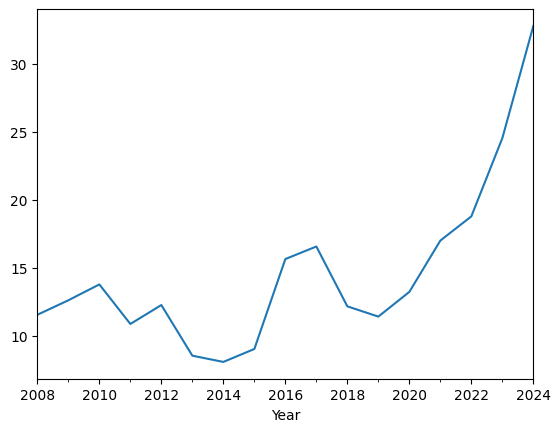

In [ ]:
inflation_year = inflation_data.groupby("Year")["Inflation_Rate"].mean().plot()

Notice how we've been on a steady uptrend for the past decade ?, Although, we had some major pullbacks between 2013- 2017 and 2018 - 2020 and the highest inflation has ever been is the current year, 2024 . We'll talk about all these shortly, as well as the factors that led us here . Let's take a look at the rest of our dataframe .

In [ ]:
inflation_data["Inflation_Rate"].corr(inflation_data["Crude Oil Price"])  # The relationship between inflation rate and crude oil price is negative, meaning that as
                                                                          # inflation rises, the price of crude oil will fall and vise versa

-0.09985093153356589

<Axes: xlabel='Year'>

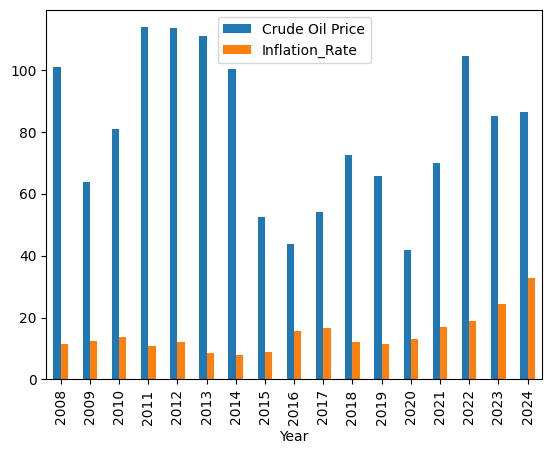

In [ ]:
inflation_data.groupby(inflation_data["Year"].dt.year)[["Crude Oil Price", "Inflation_Rate"]].mean().plot.bar()
                                                                 # This bar chart puts it more into perspective .
                                                                 # From the bar chart, you can see that with higher crude oil prices, we had a lower inflation rate .
                                                                 # But that doesn't mean that there aren't other factors that could lead to significant changes in
                                                                 # Nigeria having a lower interest rate as you can clearly see between 2013 - 2019 . let's dive deeper !

Let us take a look at the other sectors and how they were influenced by the rate of inflation over time . Note that we are using the CPI of these sectors, meaning a measure of how much the prices of these sectors have changed over time .

In [ ]:
inflation_data[["CPI_Food", "CPI_Energy", "CPI_Transport", "CPI_Health", "CPI_Education", "CPI_Communication"]] \
              .corrwith(inflation_data["Inflation_Rate"])
              # This is the correlation between inflation rate and all other sectors . You can see they are all positively correlated . Let's plot them all !

,0
CPI_Food,0.841377
CPI_Energy,0.795769
CPI_Transport,0.817517
CPI_Health,0.815598
CPI_Education,0.798156
CPI_Communication,0.756104


<Axes: xlabel='Year'>

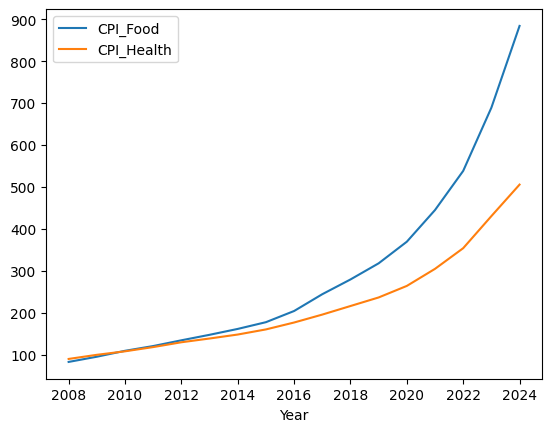

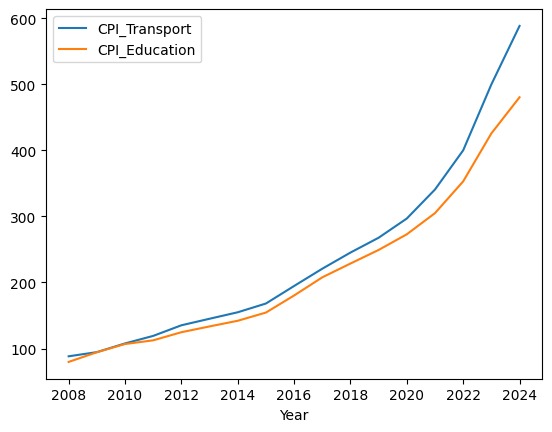

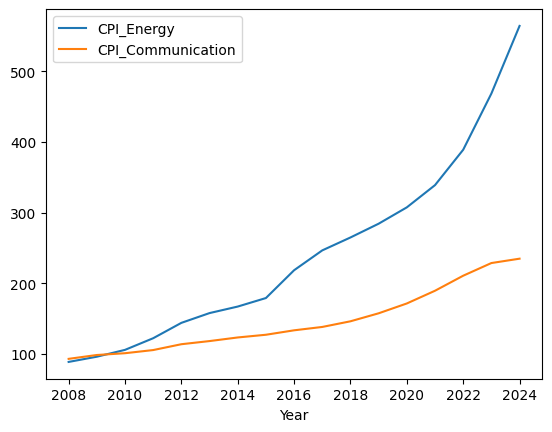

In [ ]:
inflation_data.groupby(inflation_data["Year"].dt.year)[["CPI_Food", "CPI_Health"]].mean().plot()
inflation_data.groupby(inflation_data["Year"].dt.year)[["CPI_Transport", "CPI_Education"]].mean().plot()
inflation_data.groupby(inflation_data["Year"].dt.year)[["CPI_Energy", "CPI_Communication"]].mean().plot()
                                    # A positive correlation tells us that as inflation rate rises, so do these sectors . A closer look shows us some factors
                                    # are more positively correlated to inflation than others, like; Food, transport, health, education (in this order) are more
                                    # correlated to inflation rate than energy and communication . This also means that they would be affected more by inflation
                                    # rate than energy and communication due to their direct living costs . Overall, we can see a gradual uptrend on all sectors .

Let's take a look at production and crude oil export.

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
inflation_data[["CPI_Food", "CPI_Energy", "CPI_Transport", "CPI_Health", "CPI_Education", "CPI_Communication"]] \
               .corrwith(inflation_data["Production"])
               # This shows an increase in Oil production would lead to a decrease in the price of all other sectors .

,0
CPI_Food,-0.847214
CPI_Energy,-0.855986
CPI_Transport,-0.858144
CPI_Health,-0.861074
CPI_Education,-0.863493
CPI_Communication,-0.886230


In [ ]:
inflation_data[["CPI_Food", "CPI_Energy", "CPI_Transport", "CPI_Health", "CPI_Education", "CPI_Communication"]] \
               .corrwith(inflation_data["Crude Oil Export"])
               # An increase in crude oil export would lead to a decrease in price of all other sectors .

,0
CPI_Food,-0.847214
CPI_Energy,-0.855986
CPI_Transport,-0.858144
CPI_Health,-0.861074
CPI_Education,-0.863493
CPI_Communication,-0.886230


Let's plot them all !

<Axes: xlabel='Production', ylabel='CPI_Food'>

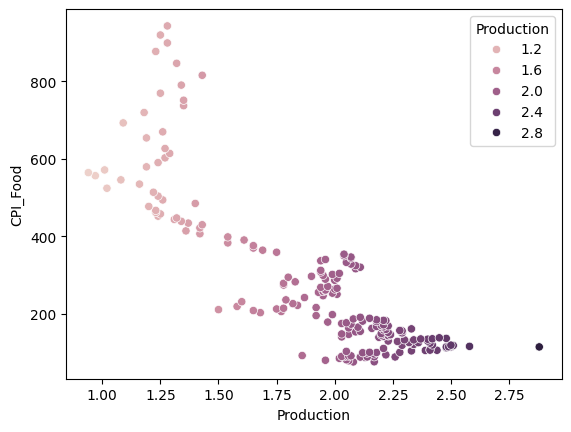

In [ ]:
sns.scatterplot(x="Production", y="CPI_Food", hue="Production", data=inflation_data)

<Axes: xlabel='Production', ylabel='CPI_Health'>

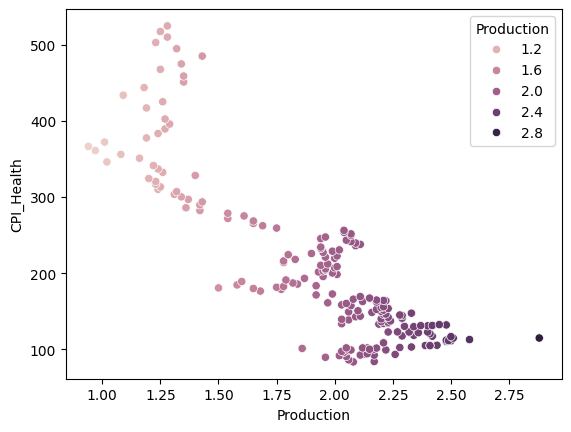

In [ ]:
sns.scatterplot(x="Production", y="CPI_Health", hue="Production", data=inflation_data)

<Axes: xlabel='Production', ylabel='CPI_Transport'>

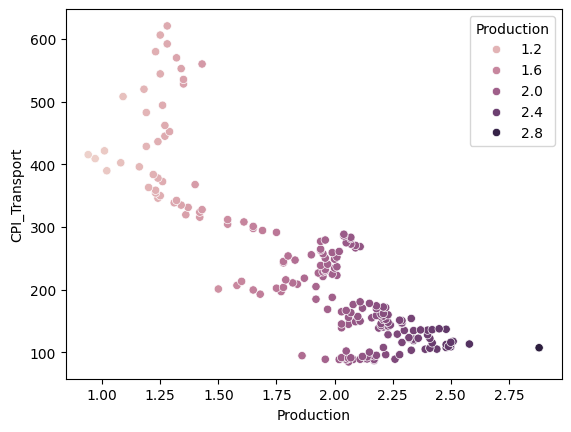

In [ ]:
sns.scatterplot(x="Production", y="CPI_Transport", hue="Production", data=inflation_data)

<Axes: xlabel='Production', ylabel='CPI_Education'>

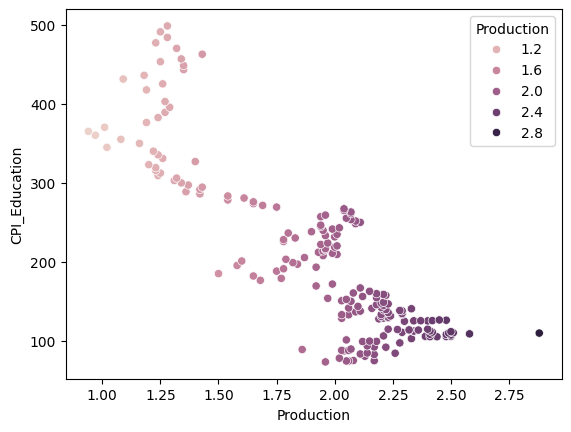

In [ ]:
sns.scatterplot(x="Production", y="CPI_Education", hue="Production", data=inflation_data)

<Axes: xlabel='Production', ylabel='CPI_Energy'>

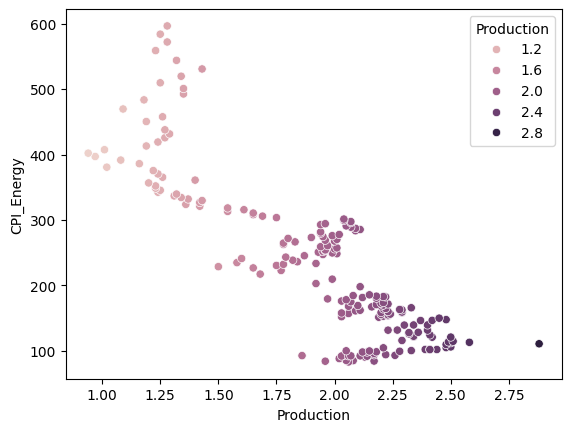

In [ ]:
sns.scatterplot(x="Production", y="CPI_Energy", hue="Production", data=inflation_data)

<Axes: xlabel='Production', ylabel='CPI_Communication'>

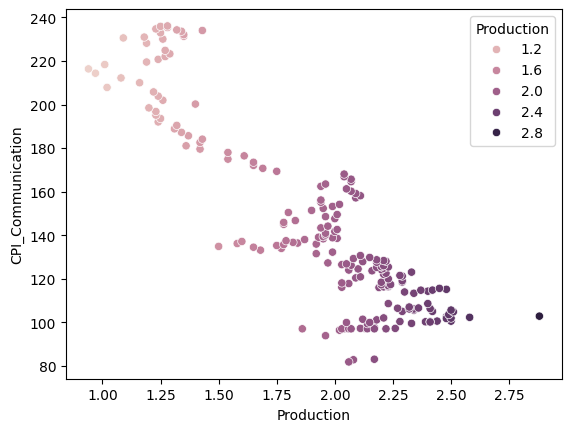

In [ ]:
sns.scatterplot(x="Production", y="CPI_Communication", hue="Production", data=inflation_data)

From the scatter plot, we can clearly see the negative correlation between all sectors and Production . They would generally give thesame relationship with crude oil exports as well since it's a negative relationship across board .

In [ ]:
inflation_data[["Production", "Crude Oil Export"]].corrwith(inflation_data["Inflation_Rate"])
               # As Crude Oil production and exports rise, inflation decreases .

,0
Production,-0.715596
Crude Oil Export,-0.715596


<Axes: xlabel='Production', ylabel='Inflation_Rate'>

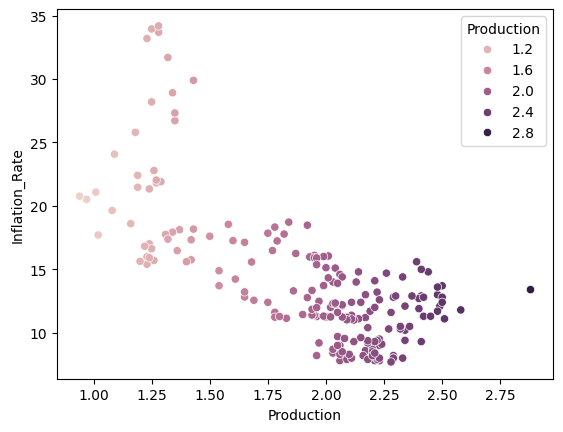

In [ ]:
sns.scatterplot(x="Production", y="Inflation_Rate", hue="Production", data=inflation_data)

<Axes: xlabel='Crude Oil Export', ylabel='Inflation_Rate'>

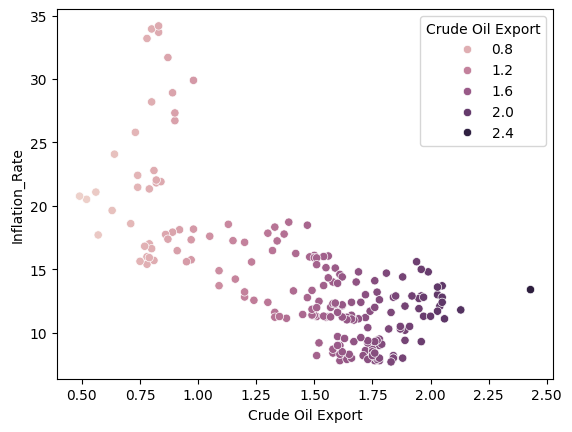

In [ ]:
sns.scatterplot(x="Crude Oil Export", y="Inflation_Rate", hue="Crude Oil Export", data=inflation_data)

A negative relationship between crude oil production and exports and all other sectors means that a potential increase in government revenue gotten from oil production and exportation would lead to lower cost of importing goods and services which would in turn stabilize prices . However, it's essential to consider that other factors may also influence prices in these sectors, so while this relationship is significant, it's part of a broader economic picture.

Let's look at the sector that has experienced the most significant cost increase . We would dive a bit deeper into the sectors that were most positively correlated to inflation rate . Let's call them Major Indicators


<Axes: title={'center': 'Percentage change in Major Indicators'}, xlabel='Year', ylabel='Percentage change'>

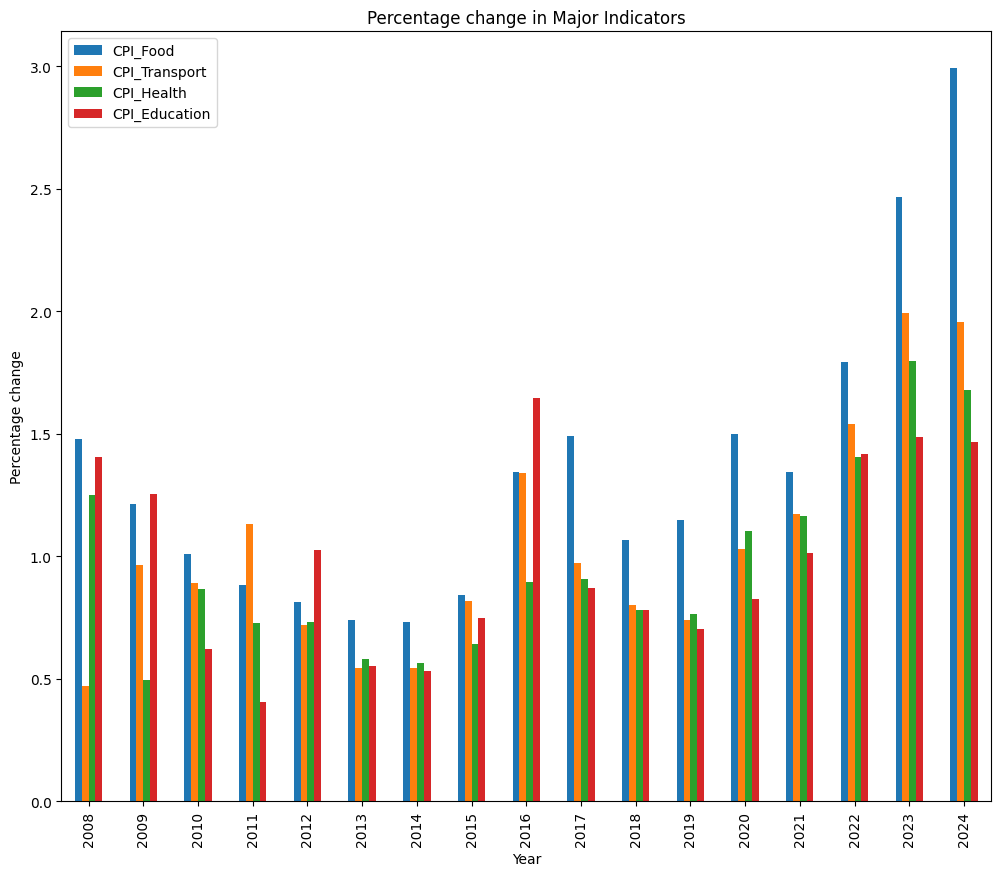

In [ ]:
sectors = inflation_data[["CPI_Food", "CPI_Transport", "CPI_Health", "CPI_Education"]].pct_change()*100
sectors.groupby(inflation_data["Year"].dt.year).mean() \
.plot.bar(title="Percentage change in Major Indicators", ylabel="Percentage change", figsize=(12, 10))
# From the bar chart below it's more than obvious that food has had the most significant increase in cost till date

The significant increase in the cost of food implies not just an increase in food prices but a reduction in the pruchasing power of households and individuals . With an increase in inflation, purchasing power reduces hence, the term "More money chasing fewer goods" . That's not all,it hits hard especially on low income earners as they would have to spend a larger percentage of their income on food and this can lead to an increase in poverty and insecurity . You can now see how and why an increase in inflation rate has generally made the major sectors very difficult over time in the Nigerian economy . There are a lot more effects to this but they will reveal themselves as we move on .

Let's look at periods of high inflation rates as it relates to the global issues of that time and how it affected the economy

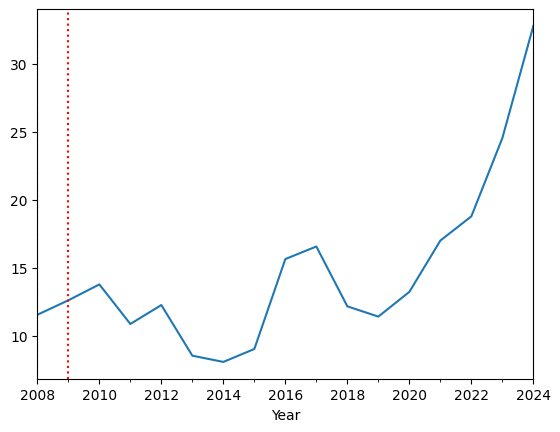

In [ ]:
inflation_year = inflation_data.groupby("Year")["Inflation_Rate"].mean().plot()
import matplotlib.pyplot as plt
plt.axvline(pd.to_datetime('2008'), color='k', linestyle=':')
plt.axvline(pd.to_datetime('2009'), color='r', linestyle=':')

 From our data the first sharp increase in inflation rate is between 2008 to 2009 . This period was characterized by Global financial crisis, food price inflation, exchange rate depreciation as well as security challenges and infastructure constraints . Now, let's connect the dots . The global financial crisis meant lower purchase of oil exports due to low demand which made imports of essential goods and services difficult leading to an increase in food prices . Can you see how the correlation comes in here ?, an increase in food prices potentially drove all major indicators on the high side as well and a depreciation of the Naira was a major contributor to this . Let's keep moving ...

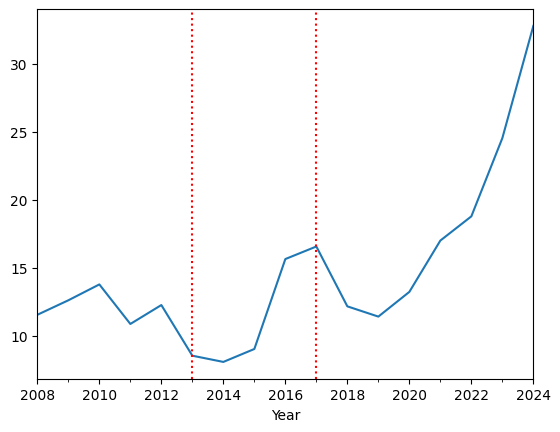

In [ ]:
inflation_year = inflation_data.groupby("Year")["Inflation_Rate"].mean().plot()
import matplotlib.pyplot as plt
plt.axvline(pd.to_datetime('2013'), color='r', linestyle=':')
plt.axvline(pd.to_datetime('2017'), color='r', linestyle=':')

Between 2013 to 2017 you can see there were minor pullbacks in inflation rate which still led to higher levels in inflation rate particularly between 2016 to 2017 and this was attributed by the global oil price crash . This affected oil exports and led to a further depreciation of the Naira compared to other foreign currencies . Being an oil dependent country, this took it's toll on the Nigerian economy because it gradually led to a recession in 2016, leading to lower foreign exchange reserves, higher import costs and fuel price increases .

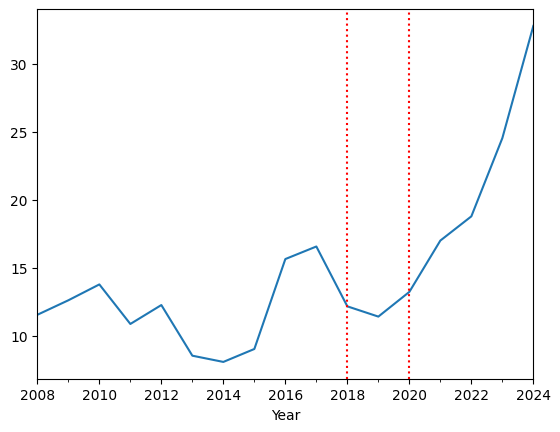

In [ ]:
inflation_year = inflation_data.groupby("Year")["Inflation_Rate"].mean().plot()
import matplotlib.pyplot as plt
plt.axvline(pd.to_datetime('2018'), color='r', linestyle=':')
plt.axvline(pd.to_datetime('2020'), color='r', linestyle=':')

From 2018 - 2020 we had some pullbacks but ultimately we saw more spikes in inflation rate owing to the global Covid 19 Pandemic . The global pandemic had a profound impact on supply chains, production, and consumption patterns due to the closurer of Nigeria's borders .  Nigeria experienced disruptions in food supply and production, coupled with a slow economy at the time . The inflation at this time was mainly driven by supply chain disruptions and an increase in the prices of goods and services, services in this case refers to transport, health as well as education costs .  

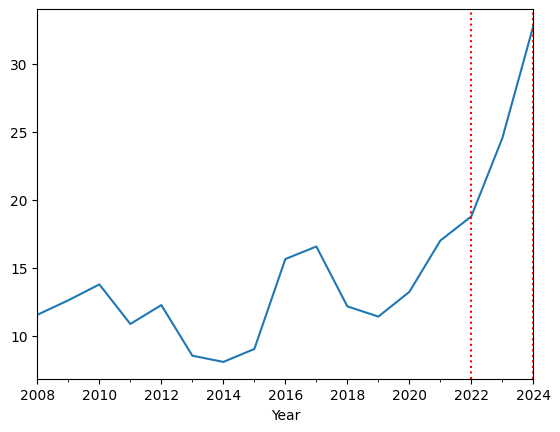

In [ ]:
inflation_year = inflation_data.groupby("Year")["Inflation_Rate"].mean().plot()
import matplotlib.pyplot as plt
plt.axvline(pd.to_datetime('2022'), color='r', linestyle=':')
plt.axvline(pd.to_datetime('2024'), color='r', linestyle=':')

You might be wondering why we are still experiencing even greater levels of inflation till this date, well, a couple factors actually, like continuous depreciation of the Naira, global economic conditions like the recent Ukrain war has not only led to more disruptions in the supply chains but a global increase in energy prices and despite being an oil producing country, we import most of our refined petroleum products, which is why this has led to higher costs of fuel, transportation,production, further driving inflation higher. The removal of fuel subsidy, agricultural challenges as well as insecurity, public dept and fiscal deficit etc. All of these and more are reasons why we are still experiencing high inflationary pressures in the Nigerian economy till date .

In [ ]:
#POLICY RECOMMENDATIONS
#To conclude this analysis, i'd like to  suggest a few points that would generally ease inflation rate leading to lower costs in all other major sectors .
# 1. STABILIZATION OF THE EXCHANGE RATE - This would have a positive impact on all sectors because it would lead to lower cost of importing goods and services
# 2. IMPROVING AGRICULTURAL PRODUCTIVITY - This improves affordability for consumers, reduces inflationary pressure, and boosts economic growth in related industries .
# 3. REDUCING DEPENDENCE ON IMPORTS - Promoting local production of energy to help reduce the impact of global oil fluctuations .
# 4. REFORMING FUEL SUBCIDIES - The removal of fuel subsidies has a direct impact on the transportation and logistics sectors, which heavily rely on fuel for moving
# goods and people. Gradual reform of subsidies can reduce the cost of doing business, making transportation and distribution more affordable and efficient .
# 5. EXPANDING SOCIAL SAFETY NETS - Expanded safety nets benefit sectors like healthcare and education, ensuring that vulnerable populations have access to essential services.
# These programs also stimulate demand for basic goods and services, benefiting the retail and agriculture sectors.

In [ ]:
# Thank you for taking the time to look at my work, cheers !